## <b>■ SVM 기본실습</b>

In [6]:
# sklearn SVM module import
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear') # 선형분류 kernel
training_points = [[1, 2], [1, 5], [2, 2], [7, 5], [9, 4], [8, 2]]
labels = [1, 1, 1, 0, 0, 0]

classifier.fit(training_points, labels) # SVM 모델 훈련

print(classifier.predict([[3, 2]]))
print(classifier.predict([[9, 2]]))
print(classifier.support_vectors_) # SV 확인

[1]
[0]
[[7. 5.]
 [8. 2.]
 [2. 2.]]


## <b>■ SVM hyper parameter C와 $\gamma$ 테스트</b>
    C : SVM 모델이 오류를 어느정도 허용할 것인지, 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용할지 결정하는 파라미터
    γ : 하나의 데이터 샘플이 영향력을 행사하는 거리. 결정경계의 곡률을 조정
![C,gamma](http://cfile275.uf.daum.net/image/99B779445F04F07E0E361C)

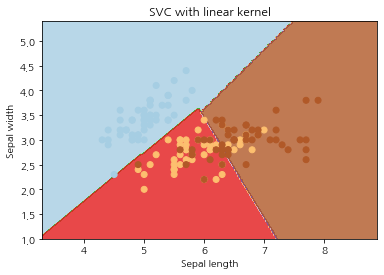

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features. We could

# avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1, gamma=1).fit(X, y)  # C 테스트
# svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)  # 감마 테스트

# create a mesh to plot in

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

plt.show()

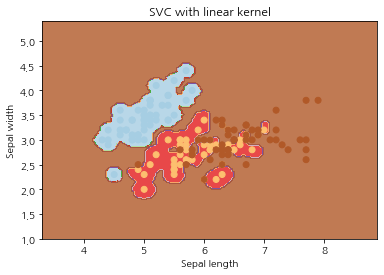

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()

X = iris.data[:, :2]  # we only take the first two features. We could

# avoid this ugly slicing by using a two-dim dataset
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter
#svc = svm.SVC(kernel='linear', C=1000, gamma=1).fit(X, y)  # C 테스트
svc = svm.SVC(kernel='rbf', C=1, gamma=100).fit(X, y)  # 감마 테스트

# create a mesh to plot in

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

plt.show()